Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel $\rightarrow$ Restart) and then **run all cells** (in the menubar, select Cell $\rightarrow$ Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
NAME = "Karla Reyes"
COLLABORATORS = "Karla Reyes"

---

Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel $\rightarrow$ Restart) and then **run all cells** (in the menubar, select Cell $\rightarrow$ Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
NAME = "Karla Reyes"
COLLABORATORS = "Karla Reyes"

In [ ]:
## Project Name: Predicting Treatment for Heart Attack Patients

In [2]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import random 
import sqlite3
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sqlalchemy import create_engine


df= pd.read_csv('/home/krr110/heart_attack_dataset.csv')
print(df.head())

   Gender  Age  Blood Pressure (mmHg)  Cholesterol (mg/dL) Has Diabetes  \
0    Male   70                    181                  262           No   
1  Female   55                    103                  253          Yes   
2    Male   42                     95                  295          Yes   
3    Male   84                    106                  270           No   
4    Male   86                    187                  296          Yes   

  Smoking Status   Chest Pain Type                            Treatment  
0          Never    Typical Angina                    Lifestyle Changes  
1          Never   Atypical Angina                          Angioplasty  
2        Current    Typical Angina                          Angioplasty  
3          Never   Atypical Angina  Coronary Artery Bypass Graft (CABG)  
4        Current  Non-anginal Pain                           Medication  


In [4]:
# Data Cleaning 
# handling missing values 

missing_values = df.isnull().sum()
missing_values

# no missing values, but if we did have missing values, we would impute missing values with mean, median or mode
df.fillna(df.mean(numeric_only=True))

# next we can convert to categorical variables
df['Gender']=df['Gender'].astype('category').cat.codes
df['Has Diabetes']=df['Has Diabetes'].astype('category').cat.codes
df['Smoking Status']=df['Smoking Status'].astype('category').cat.codes
df['Chest Pain Type']=df['Chest Pain Type'].astype('category').cat.codes 
df['Treatment']=df['Treatment'].astype('category').cat.codes
# For Gender, 1 is Male 0 is Female
# For Smoking Status, 0 is Current, 1 is Former, 2 is Never
# For Chest Pain, 0 is Asymptomatic, 1 is Atypical Angina, 2 is Non-anginal Pain, 3 is typical Angina 
df.head(10)



,Gender,Age,Blood Pressure (mmHg),Cholesterol (mg/dL),Has Diabetes,Smoking Status,Chest Pain Type,Treatment
0,1,70,181,262,0,2,3,2
1,0,55,103,253,1,2,1,0
2,1,42,95,295,1,0,3,0
3,1,84,106,270,0,2,1,1
4,1,86,187,296,1,0,2,3
5,0,66,125,271,1,1,3,1
6,1,33,181,262,1,0,0,2
7,1,84,182,288,0,0,2,2
8,1,73,115,286,1,2,0,0
9,0,63,174,254,1,1,2,0


In [23]:
# Normalizing numerical features to assure more accurate predictions
numerical_features= ['Age', 'Blood Pressure (mmHg)', 'Cholesterol (mg/dL)']
scaler=StandardScaler()
df[numerical_features]= scaler.fit_transform(df[numerical_features])

# for heart diseases, it is important to check for multicollinearity
def calculate_vif(X):
    vif_data=pd.DataFrame()
    vif_data["Features"]=X.columns
    vif_data["VIF"]=[variance_inflation_factor(X.values, i)
                     for i in range(X.shape[1])]
    return vif_data

vif_df= calculate_vif(df[numerical_features])
print(vif_df)

                Features       VIF
0                    Age  1.000014
1  Blood Pressure (mmHg)  1.001979
2    Cholesterol (mg/dL)  1.001971


---

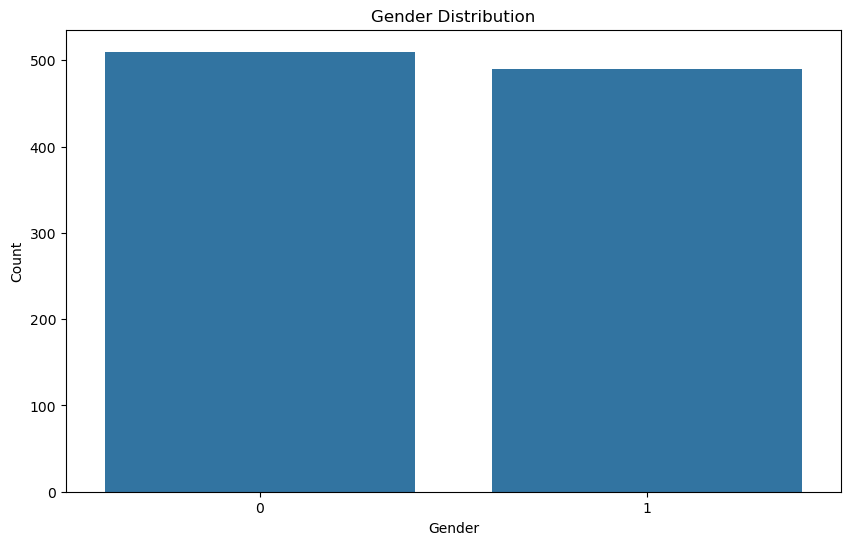

In [30]:
# Lets do some data analysis 
# Lets see the distribution for gender
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

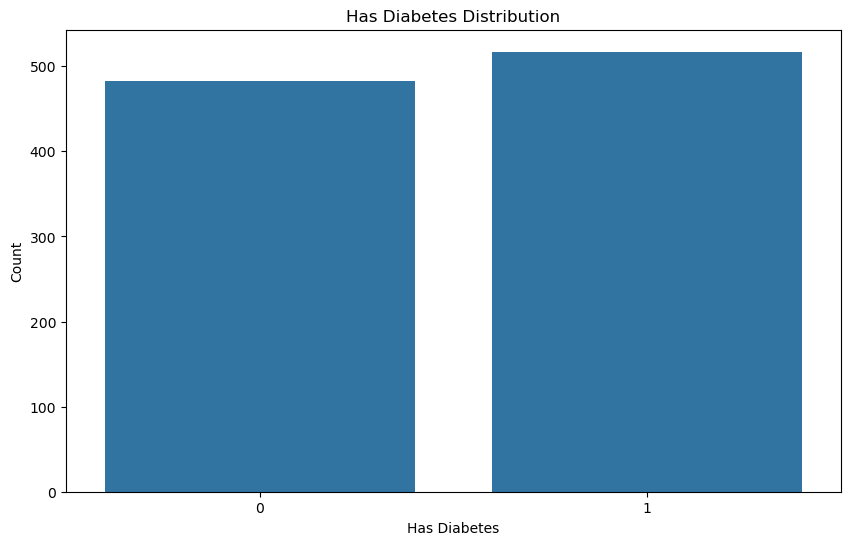

In [31]:
# Distribution of Diabetes 
plt.figure(figsize=(10, 6))
sns.countplot(x='Has Diabetes', data=df)
plt.title('Has Diabetes Distribution')
plt.xlabel('Has Diabetes')
plt.ylabel('Count')
plt.show()

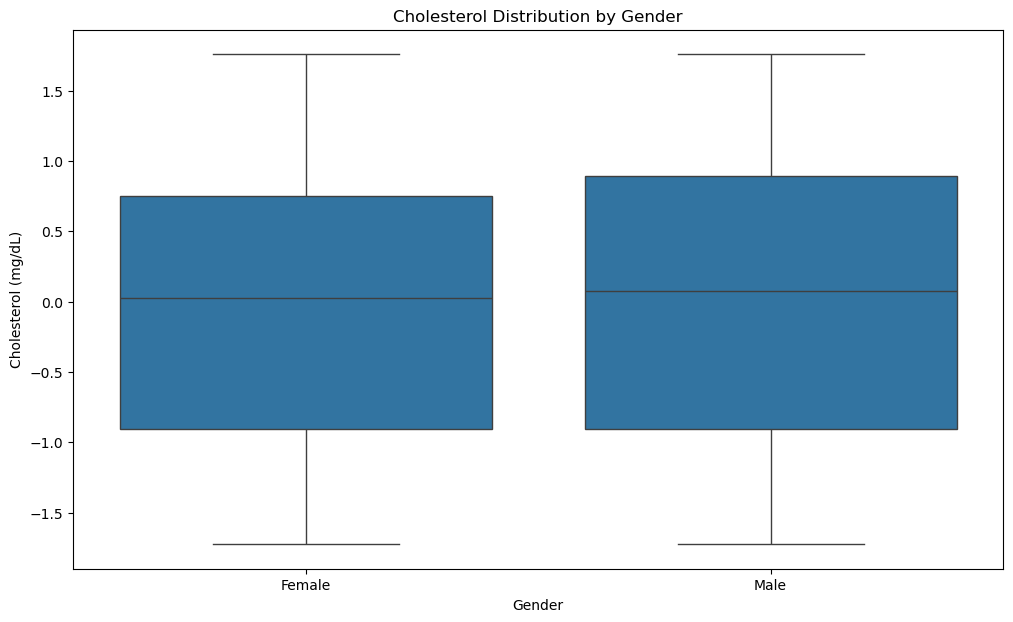

In [25]:
#Distribution of Cholesterol by Gender
plt.figure(figsize=(12,7))
sns.boxplot(x='Gender',y='Cholesterol (mg/dL)',data=df)
plt.title('Cholesterol Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Cholesterol (mg/dL)')
plt.xticks(ticks=[0,1],labels=['Female','Male'])
plt.show()

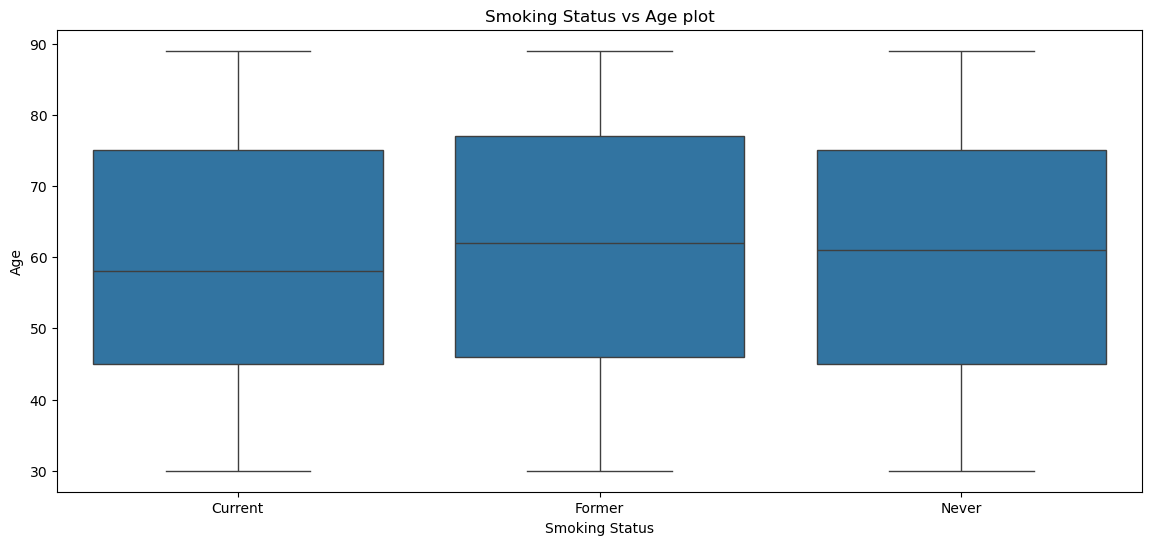

In [5]:
plt.figure(figsize=(14,6))
sns.boxplot(x=df['Smoking Status'],y=df.Age,data=df)
plt.title("Smoking Status vs Age plot")
plt.xlabel("Smoking Status")
plt.ylabel("Age")
plt.xticks([0,1, 2], ['Current', 'Former','Never'])
plt.show() #Smoking Status vs Age plot

In [ ]:
plt.figure(figsize=(14,7))
sns.scatterplot(x=df['Age'],y=df['Blood Pressure (mmHg)'],hue='Gender',data=df)
plt.title("Age vs Blood Pressure 0-Female 1-Male")
plt.xlabel("Age")
plt.ylabel("Blood Pressure (mmHg)")
plt.show() 

In [ ]:
plt.figure(figsize=(14,7))
sns.scatterplot(x=df['Age'],y=df['Cholesterol (mg/dL)'],hue='Gender',data=df)
plt.title("Age vs Cholesterol (mg/dL) 0-Female 1-Male")
plt.xlabel("Age")
plt.ylabel("Cholesterol (mg/dL)")
plt.show()

In [ ]:
# Lets create a heatmap to portray the correlation between each column 
sns.heatmap(df.corr(),annot=True)
plt.show() 


In [9]:
# now we want to start doing prediction. Given this dataset, our predictions would be Treatment Prediction based on 7 variables
# predicting best treatment type based on certain predictors 
X = df.drop(columns=['Treatment'])  # Features
y = df['Treatment']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

print(model)

y_pred = model.predict(X_test)

r2_score = model.score(X_test, y_test)
print("R^2 Score:", r2_score)


Accuracy: 0.235

Classification Report:
               precision    recall  f1-score   support

           0       0.20      0.21      0.20        48
           1       0.19      0.19      0.19        47
           2       0.22      0.27      0.24        52
           3       0.37      0.26      0.31        53

    accuracy                           0.23       200
   macro avg       0.24      0.23      0.24       200
weighted avg       0.25      0.23      0.24       200

RandomForestClassifier(random_state=42)
R^2 Score: 0.235


In [ ]:
# given our low R^2 value, our prediction model isn't very good in predicting what best treatment fits someone based on different heart attack risk factors. 
